# Computer Vision 1: Assignment 1

Task 1

Group Number 43

Marek Drwal

17.11.2025

## setup

In [44]:
import numpy as np

## data

Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009, https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

In [45]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [46]:
data_dir = "C:/Users/admin/Documents/cifar-10-python/cifar-10-batches-py"

In [47]:
label_names = unpickle(data_dir + '/batches.meta')

## defs

In [48]:
selected_classes = [1,4,8]

In [49]:
def extract_top_n(n, batch, batch_labels, selected_classes):
    extracted_top_list = []
    extracted_top_labs = []

    for class_lab in selected_classes:
        first_imgs = batch[b'data'][batch_labels == class_lab][:n,]
        first_labs = batch_labels[batch_labels == class_lab][:n,]
        extracted_top_list.append(first_imgs)
        extracted_top_labs.append(first_labs)

    extracted_top_list = np.array(extracted_top_list)
    extracted_top_list = extracted_top_list.reshape((len(selected_classes)*n, 3072))
    extracted_top_labs = np.array(extracted_top_labs).ravel()
    return extracted_top_list, extracted_top_labs

In [50]:
def generate_histograms(imgs, bins):
    hists = []
    for img in imgs:
        red = img[:1024].ravel().astype(np.float64)
        green = img[1024:2048].ravel().astype(np.float64)
        blue = img[2048:].ravel().astype(np.float64)
        gray = red + green + blue
        gray /= 3
        hist, _ = np.histogram(gray, bins=bins, range=(0,255))
        hists.append(hist)
    return hists

In [51]:
def generate_bins(bin_size, no_bins):
    bins = []
    for i in range(no_bins+1):
        edge = i*bin_size
        bins.append(edge)
    return bins

In [52]:
def L2_norm(h1, h2):
    return np.sqrt(np.sum(np.square(h1-h2)))

In [53]:
def classify(train_hists, test_hists, train_labs, test_labs, verbose=False):
    preds = []
    if verbose:
        print('test id, tr id, lab 30, lab 10')
    for test_id, test_h in enumerate(test_hists):
        dists = []
        for train_h in train_hists:
            dist = L2_norm(test_h, train_h)
            dists.append(dist)
        pred_id = np.argmin(dists)
        if verbose:
            print(test_id, pred_id, train_labs[pred_id], test_labs[test_id])
            print(dists)
        preds.append(train_labs[pred_id])

    accuracy = np.sum(np.equal(preds, test_labs))
    accuracy /= len(test_hists)
    return accuracy

## batch 1

In [54]:
data_batch_1 = unpickle(data_dir + '/data_batch_1')
data_batch_1_labels = np.array(data_batch_1[b'labels'])

### first 30 in classes

In [55]:
extracted_top_30_list, extracted_top_30_labs = extract_top_n(n=30, batch=data_batch_1, batch_labels=data_batch_1_labels, selected_classes=selected_classes)

In [56]:
extracted_top_30_list

array([[170, 168, 177, ...,  82,  78,  80],
       [159, 150, 153, ...,  14,  17,  19],
       [ 50,  51,  42, ..., 166, 166, 162],
       ...,
       [ 58,  51,  50, ...,  70,  63,  57],
       [196, 203, 212, ...,  94, 100, 106],
       [ 61,  62,  62, ...,  92,  90,  91]], dtype=uint8)

In [57]:
extracted_top_30_labs

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8])

### histograms

In [58]:
bin_size = 5
no_bins = 51

In [59]:
bins = generate_bins(bin_size, no_bins)
print(bins)
hists_train = generate_histograms(extracted_top_30_list, bins)
hists_train

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255]


[array([23, 27, 12, 23, 13, 17, 13, 14, 11, 11, 11, 18, 21, 26, 58, 72, 67,
        53, 57, 59, 49, 22, 19, 20, 12, 17, 11, 12,  7,  8,  7,  3,  6, 12,
         9, 22, 42, 36, 27, 19,  8,  8,  8,  6,  8,  6,  3,  5,  5,  0,  1]),
 array([ 0,  0,  7, 20, 23, 20, 30, 31, 33, 34, 36, 34, 40, 52, 55, 48, 52,
        38, 24, 29, 29, 25, 41, 38, 44, 38, 40, 30, 25, 19, 21, 18, 15,  8,
         9,  3,  1,  2,  1,  2,  0,  2,  2,  1,  1,  0,  1,  2,  0,  0,  0]),
 array([41, 26, 22, 25, 26, 28, 36, 27, 20, 27, 26, 28, 21, 31, 30, 34, 49,
        35, 29, 21,  8, 18, 14, 20, 29, 18, 17, 17,  6, 13, 24, 17, 20, 46,
        59, 23, 21, 11,  3, 10,  2,  4,  4,  7, 11,  4,  6,  1,  5,  2,  2]),
 array([ 0,  0,  2,  3,  7, 18, 21, 19, 31, 41, 40, 44, 48, 39, 46, 42, 36,
        26, 40, 27, 37, 46, 40, 36, 34, 26, 22, 25, 27, 24, 19, 20, 21, 23,
        14, 11, 12, 13,  4, 14,  8,  6,  1,  2,  1,  3,  1,  2,  0,  1,  1]),
 array([ 6, 16, 11, 14, 24, 24, 22, 24, 28, 34, 35, 52, 38, 28, 38, 34, 48,
    

## test batch

In [60]:
test_batch = unpickle(data_dir + '/test_batch')
test_batch_labels = np.array(test_batch[b'labels'])

### first 10 in classes

In [61]:
extracted_top_10_list, extracted_top_10_labs = extract_top_n(10, test_batch, test_batch_labels, selected_classes)
extracted_top_10_list

array([[160, 185, 209, ...,  31,  34,  28],
       [217, 210, 205, ..., 204, 225, 223],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [215, 211, 207, ..., 132, 130, 129],
       [ 76,  76,  79, ...,  73,  73,  71],
       [255, 251, 251, ..., 250, 250, 251]], dtype=uint8)

In [62]:
extracted_top_10_labs

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8])

### histograms

In [63]:
bins = generate_bins(bin_size, no_bins)
print(bins)
hists_test = generate_histograms(extracted_top_10_list, bins)
hists_test

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255]


[array([  8,  24,  25,  39,  29,  30,  32,  34,  35,  61,  62, 115,  93,
         52,  36,  36,  21,  33,  21,  19,  19,  18,  11,  10,   6,  10,
          3,   7,   5,   6,   9,   8,   9,   5,   4,   5,   8,   5,   8,
         11,  11,   8,   6,   6,   4,   9,   3,   0,   4,   1,   0]),
 array([ 0,  0,  0,  0,  0,  7, 20, 14, 14,  8, 13, 22, 26, 16, 28, 16, 30,
        17, 26, 21, 27, 33, 36, 29, 28, 23, 16, 19, 17, 26, 28, 31, 31, 24,
        18, 30, 25, 22, 17, 26, 19, 23, 33, 24, 20, 21, 17,  9, 56, 18,  0]),
 array([ 0,  0,  1,  0,  3, 12,  9, 14, 15, 17, 15, 18, 19, 13, 14, 19, 11,
        19, 15, 18, 15, 11, 11, 16, 14, 24, 24, 18, 25, 19, 29, 14, 15, 17,
        14, 27, 16, 18, 19, 12, 15, 21, 25, 35, 38, 42, 31, 61, 54, 51, 61]),
 array([ 3, 16, 31, 21, 21, 15, 15, 21, 10,  9, 10, 20, 18, 18, 20,  7,  9,
        12, 13, 15, 22, 24, 34, 21, 51, 87, 85, 59, 41, 26, 28, 21, 22, 29,
        34, 32, 22, 20, 26, 17,  2,  5,  3,  2,  3,  3,  1,  0,  0,  0,  0]),
 array([127,  60,  36

## classification

In [64]:
classify(hists_train, hists_test, extracted_top_30_labs, extracted_top_10_labs)

np.float64(0.6)

### img peek

test set

np.int64(1)

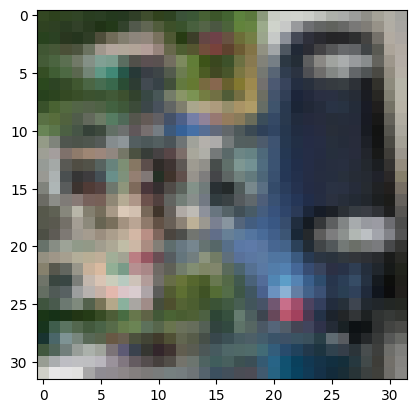

In [65]:
import matplotlib.pyplot as plt
xx = 9
plt.imshow(extracted_top_10_list[xx].reshape(3,32,32).T)
extracted_top_10_labs[xx]

training set

np.int64(1)

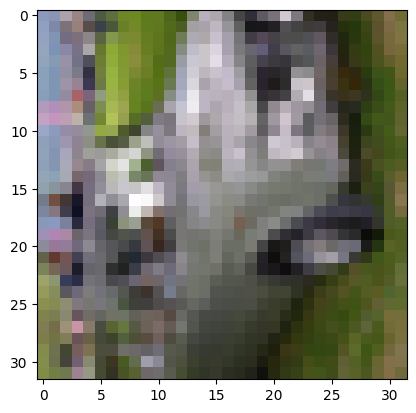

In [66]:
yy = 3
plt.imshow(extracted_top_30_list[yy].reshape(3,32,32).T)
extracted_top_30_labs[yy]

## 255 bins

In [67]:
no_bins = 255
bin_size = 1

In [68]:
bins = generate_bins(bin_size, no_bins)
print(bins)
hists_train = generate_histograms(extracted_top_30_list, bins)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [69]:
bins = generate_bins(bin_size, no_bins)
print(bins)
hists_test = generate_histograms(extracted_top_10_list, bins)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [70]:
classify(hists_train, hists_test, extracted_top_30_labs, extracted_top_10_labs)

np.float64(0.6333333333333333)

## 10 bins

In [71]:
no_bins = 10
bin_size = 255/no_bins

In [72]:
bins = generate_bins(bin_size, no_bins)
print(bins)
hists_train = generate_histograms(extracted_top_30_list, bins)

[0.0, 25.5, 51.0, 76.5, 102.0, 127.5, 153.0, 178.5, 204.0, 229.5, 255.0]


In [73]:
bins = generate_bins(bin_size, no_bins)
print(bins)
hists_test = generate_histograms(extracted_top_10_list, bins)

[0.0, 25.5, 51.0, 76.5, 102.0, 127.5, 153.0, 178.5, 204.0, 229.5, 255.0]


In [74]:
classify(hists_train, hists_test, extracted_top_30_labs, extracted_top_10_labs)

np.float64(0.5666666666666667)

## 2 bins

In [75]:
no_bins = 2
bin_size = 255/no_bins

In [76]:
bins = generate_bins(bin_size, no_bins)
print(bins)
hists_train = generate_histograms(extracted_top_30_list, bins)

[0.0, 127.5, 255.0]


In [77]:
bins = generate_bins(bin_size, no_bins)
print(bins)
hists_test = generate_histograms(extracted_top_10_list, bins)

[0.0, 127.5, 255.0]


In [78]:
classify(hists_train, hists_test, extracted_top_30_labs, extracted_top_10_labs)

np.float64(0.26666666666666666)

more bins - better accuracy